In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

# BERT- ALL SCALED

In [5]:
def getFeaturesAndTargetRemoveDate(_df):
    train_y = _df['target']
    train = _df.drop(['date','target'],axis =1)
    return train, train_y

In [6]:
trainingData = pd.read_csv('train_bert_tnfi.csv')
testingData =  pd.read_csv('test_bert_tnfi.csv')

In [7]:
train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

In [9]:
print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (4696, 1613) test (308, 1613) len(train_y) 4696 len(test_y) 308


In [10]:
# Naive Bayes for Baseline
from sklearn.naive_bayes import GaussianNB
def NaiveBayes(train_features , train_labels, test_features,test_labels):
    gnb = GaussianNB()
    y_pred = gnb.fit(train_features, train_labels).predict(test_features)
    print('accuracy_score',accuracy_score(y_pred, test_labels))
    print('classification_score\n',classification_report(y_pred, test_labels))
    

In [10]:
def DenseNetwork(featureLength):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=featureLength,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [11]:
n_epoch=125

In [12]:
def CNN_LSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3+
    
    model.add(LSTM(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [13]:
def CNN_RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [14]:
def CNN_GRUNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(GRU(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [15]:
def CNN_BideirectionalLSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(Bidirectional(LSTM(100)))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [16]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=256, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    return history

In [17]:
def vizModelMetric(history,n_epoch):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [18]:
def NaivePredition(y_test):
    
    y_testCheck = y_test.copy()
    y_pred = list()
    
    for counter in range(len(y_testCheck)-1):
        y_pred.append(y_testCheck[counter])
    
    y_testCheck = y_testCheck[1:]
    print ('Model accuracy = %.3f' % accuracy_score(y_pred,y_testCheck))

    print('classification_score\n',classification_report(y_pred, y_testCheck))

In [19]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



In [11]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.525974025974026
classification_score
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.96      0.54      0.69       301

   micro avg       0.53      0.53      0.53       308
   macro avg       0.48      0.27      0.34       308
weighted avg       0.94      0.53      0.67       308



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               161400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 171,601
Trainable params: 171,601
Non-trainable params: 0
_______________

Epoch 106/125
4226/4226 [==============================] - 0s 50us/step - loss: 0.3818 - acc: 0.9120 - val_loss: 1.3757 - val_acc: 0.6830
Epoch 107/125
4226/4226 [==============================] - 0s 50us/step - loss: 0.3730 - acc: 0.9153 - val_loss: 1.6999 - val_acc: 0.6702
Epoch 108/125
4226/4226 [==============================] - 0s 51us/step - loss: 0.3703 - acc: 0.9129 - val_loss: 1.7759 - val_acc: 0.6340
Epoch 109/125
4226/4226 [==============================] - 0s 52us/step - loss: 0.3768 - acc: 0.9132 - val_loss: 1.8656 - val_acc: 0.6596
Epoch 110/125
4226/4226 [==============================] - 0s 52us/step - loss: 0.3779 - acc: 0.9167 - val_loss: 1.3745 - val_acc: 0.6872
Epoch 111/125
4226/4226 [==============================] - 0s 51us/step - loss: 0.3745 - acc: 0.9172 - val_loss: 1.4883 - val_acc: 0.6915
Epoch 112/125
4226/4226 [==============================] - 0s 52us/step - loss: 0.3738 - acc: 0.9184 - val_loss: 1.6868 - val_acc: 0.6702
Epoch 113/125
4226/4226 [=========

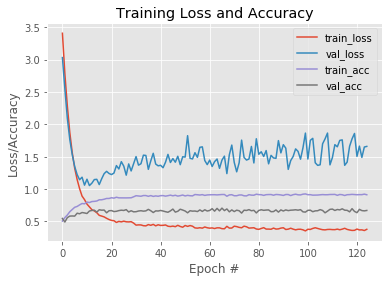

In [21]:
featureLength = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

In [20]:
# Research paper and models -> https://github.com/EmielStoelinga/CCMLWI

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 34s 8ms/step - loss: 0.6935 - acc: 0.5080 - val_loss: 0.6992 - val_acc: 0.4213
Epoch 2/125
4226/4226 [==============================] - 31s 7ms/step - loss: 0.6940 - 

Epoch 114/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5896 - acc: 0.5857 - val_loss: 2.2104 - val_acc: 0.5298
Epoch 115/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5899 - acc: 0.5783 - val_loss: 2.2760 - val_acc: 0.5191
Epoch 116/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5898 - acc: 0.5738 - val_loss: 2.3064 - val_acc: 0.5255
Epoch 117/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5896 - acc: 0.5726 - val_loss: 2.3139 - val_acc: 0.5234
Epoch 118/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5900 - acc: 0.5677 - val_loss: 2.3350 - val_acc: 0.5170
Epoch 119/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5895 - acc: 0.5698 - val_loss: 2.3491 - val_acc: 0.5213
Epoch 120/125
4226/4226 [==============================] - 26s 6ms/step - loss: 0.5903 - acc: 0.5639 - val_loss: 2.3481 - val_acc: 0.5277
Epoch 121/125
4226/4226 [=========

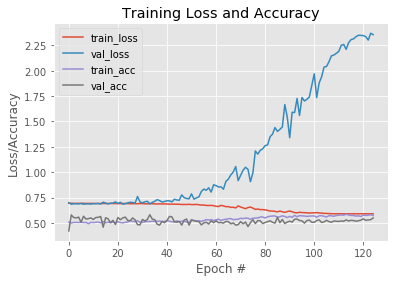

In [22]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 44s 10ms/step - loss: 0.6911 - acc: 0.5350 - val_loss: 0.7032 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 42s 10ms/step - loss: 0.686

Epoch 114/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.3819 - acc: 0.8145 - val_loss: 0.9481 - val_acc: 0.5766
Epoch 115/125
4226/4226 [==============================] - 37s 9ms/step - loss: 0.3989 - acc: 0.8138 - val_loss: 0.8802 - val_acc: 0.5702
Epoch 116/125
4226/4226 [==============================] - 36s 8ms/step - loss: 0.3800 - acc: 0.8239 - val_loss: 1.0537 - val_acc: 0.5426
Epoch 117/125
4226/4226 [==============================] - 36s 8ms/step - loss: 0.3732 - acc: 0.8313 - val_loss: 1.0659 - val_acc: 0.5383
Epoch 118/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.3578 - acc: 0.8355 - val_loss: 0.9773 - val_acc: 0.5511
Epoch 119/125
4226/4226 [==============================] - 36s 8ms/step - loss: 0.3689 - acc: 0.8308 - val_loss: 0.9360 - val_acc: 0.5894
Epoch 120/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.3794 - acc: 0.8192 - val_loss: 0.9859 - val_acc: 0.5787
Epoch 121/125
4226/4226 [=========

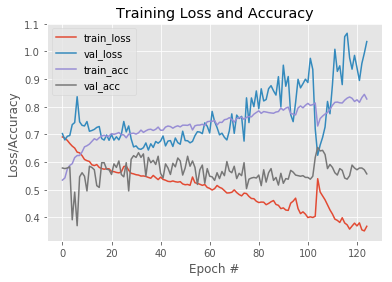

In [23]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [24]:
# inputFeatures = train.shape[1]
# n_epoch=45
# vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 20s 5ms/step - loss: 0.6944 - acc: 0.4929 - val_loss: 0.6852 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6930 - 

Epoch 114/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6046 - acc: 0.5629 - val_loss: 1.8216 - val_acc: 0.5191
Epoch 115/125
4226/4226 [==============================] - 20s 5ms/step - loss: 0.5965 - acc: 0.5658 - val_loss: 2.0524 - val_acc: 0.5149
Epoch 116/125
4226/4226 [==============================] - 20s 5ms/step - loss: 0.5921 - acc: 0.5603 - val_loss: 2.1391 - val_acc: 0.5340
Epoch 117/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.5913 - acc: 0.5760 - val_loss: 2.2854 - val_acc: 0.5149
Epoch 118/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.5909 - acc: 0.5724 - val_loss: 2.2950 - val_acc: 0.5149
Epoch 119/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.5905 - acc: 0.5750 - val_loss: 2.3530 - val_acc: 0.5170
Epoch 120/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.5912 - acc: 0.5639 - val_loss: 2.3874 - val_acc: 0.5191
Epoch 121/125
4226/4226 [=========

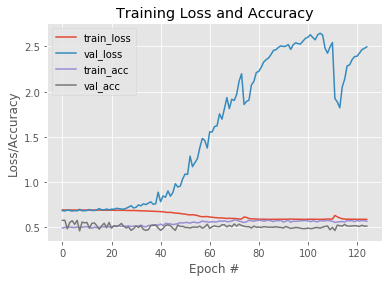

In [25]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [26]:
# inputFeatures = train.shape[1]
# n_epoch=24
# vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 11s 3ms/step - loss: 0.6998 - acc: 0.5024 - val_loss: 0.6935 - val_acc: 0.5660
Epoch 2/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6969 - 

Epoch 114/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.5942 - acc: 0.5717 - val_loss: 1.9024 - val_acc: 0.4702
Epoch 115/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.5971 - acc: 0.5674 - val_loss: 1.7984 - val_acc: 0.5021
Epoch 116/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6237 - acc: 0.5606 - val_loss: 1.5528 - val_acc: 0.4872
Epoch 117/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6659 - acc: 0.5390 - val_loss: 1.0372 - val_acc: 0.5128
Epoch 118/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6436 - acc: 0.5485 - val_loss: 1.3108 - val_acc: 0.5170
Epoch 119/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6121 - acc: 0.5658 - val_loss: 1.5183 - val_acc: 0.4830
Epoch 120/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6009 - acc: 0.5717 - val_loss: 1.6532 - val_acc: 0.4957
Epoch 121/125
4226/4226 [=========

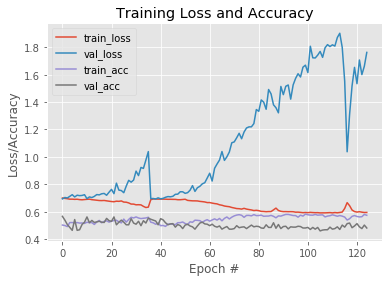

In [27]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [28]:
# inputFeatures = train.shape[1]
# n_epoch=25
# vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [29]:
# inputFeatures = train.shape[1]
# n_epoch=12
# vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

# BERT- ALL NON-SCALED

In [12]:
def getFeaturesAndTargetRemoveDate(_df):
    train_y = _df['Target']
    train = _df.drop(['date','Target'],axis =1)
    return train, train_y

In [13]:
trainingData = pd.read_csv('train_nS_bert_tnfi.csv')
testingData =  pd.read_csv('test_nS_bert_tnfi.csv')

train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (4696, 1613) test (308, 1613) len(train_y) 4696 len(test_y) 308


In [14]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.5162337662337663
classification_score
               precision    recall  f1-score   support

         0.0       0.04      0.27      0.07        22
         1.0       0.91      0.53      0.67       286

   micro avg       0.52      0.52      0.52       308
   macro avg       0.47      0.40      0.37       308
weighted avg       0.84      0.52      0.63       308



In [54]:
NaivePredition(test_y)

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               161400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 171,601
Trainable params: 171,601
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 3s 634us/step - loss: 10.2446 - 

Epoch 113/125
4226/4226 [==============================] - 0s 58us/step - loss: 7.9529 - acc: 0.5054 - val_loss: 6.7846 - val_acc: 0.5787
Epoch 114/125
4226/4226 [==============================] - 0s 55us/step - loss: 7.9490 - acc: 0.5057 - val_loss: 6.7845 - val_acc: 0.5787
Epoch 115/125
4226/4226 [==============================] - 0s 53us/step - loss: 7.9527 - acc: 0.5054 - val_loss: 6.7844 - val_acc: 0.5787
Epoch 116/125
4226/4226 [==============================] - 0s 55us/step - loss: 7.9602 - acc: 0.5050 - val_loss: 6.7843 - val_acc: 0.5787
Epoch 117/125
4226/4226 [==============================] - 0s 59us/step - loss: 7.9488 - acc: 0.5057 - val_loss: 6.7842 - val_acc: 0.5787
Epoch 118/125
4226/4226 [==============================] - 0s 53us/step - loss: 7.9525 - acc: 0.5054 - val_loss: 6.7841 - val_acc: 0.5787
Epoch 119/125
4226/4226 [==============================] - 0s 53us/step - loss: 7.9524 - acc: 0.5054 - val_loss: 6.7841 - val_acc: 0.5787
Epoch 120/125
4226/4226 [=========

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


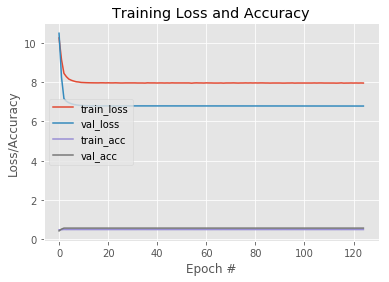

In [55]:
featureLength = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 35s 8ms/step - loss: 0.6931 - acc: 0.5007 - val_loss: 0.6873 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 32s 8ms/step - loss: 0.6930 - 

Epoch 114/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6846 - acc: 0.5154 - val_loss: 0.7424 - val_acc: 0.5128
Epoch 115/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6817 - acc: 0.5284 - val_loss: 0.7544 - val_acc: 0.5340
Epoch 116/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6829 - acc: 0.5241 - val_loss: 0.7891 - val_acc: 0.4872
Epoch 117/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6828 - acc: 0.5215 - val_loss: 0.7562 - val_acc: 0.5383
Epoch 118/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6824 - acc: 0.5201 - val_loss: 0.7705 - val_acc: 0.4936
Epoch 119/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6787 - acc: 0.5251 - val_loss: 0.7903 - val_acc: 0.5596
Epoch 120/125
4226/4226 [==============================] - 22s 5ms/step - loss: 0.6803 - acc: 0.5253 - val_loss: 0.7869 - val_acc: 0.5149
Epoch 121/125
4226/4226 [=========

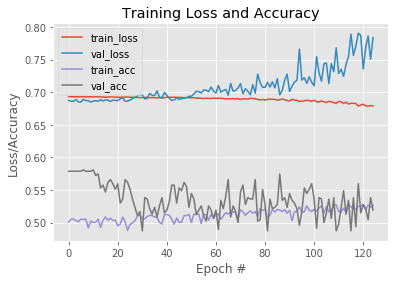

In [56]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 39s 9ms/step - loss: 0.7008 - acc: 0.5019 - val_loss: 0.6836 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 36s 8ms/step - loss: 0.6954 

Epoch 114/125
4226/4226 [==============================] - 47s 11ms/step - loss: 0.3054 - acc: 0.8658 - val_loss: 0.5359 - val_acc: 0.7702
Epoch 115/125
4226/4226 [==============================] - 46s 11ms/step - loss: 0.3056 - acc: 0.8665 - val_loss: 0.5250 - val_acc: 0.7489
Epoch 116/125
4226/4226 [==============================] - 47s 11ms/step - loss: 0.2978 - acc: 0.8727 - val_loss: 0.6133 - val_acc: 0.7447
Epoch 117/125
4226/4226 [==============================] - 49s 11ms/step - loss: 0.3094 - acc: 0.8637 - val_loss: 0.6936 - val_acc: 0.7043
Epoch 118/125
4226/4226 [==============================] - 50s 12ms/step - loss: 0.3046 - acc: 0.8734 - val_loss: 0.6678 - val_acc: 0.7149
Epoch 119/125
4226/4226 [==============================] - 48s 11ms/step - loss: 0.2903 - acc: 0.8770 - val_loss: 0.5876 - val_acc: 0.7298
Epoch 120/125
4226/4226 [==============================] - 46s 11ms/step - loss: 0.3018 - acc: 0.8691 - val_loss: 0.5723 - val_acc: 0.7468
Epoch 121/125
4226/4226 [==

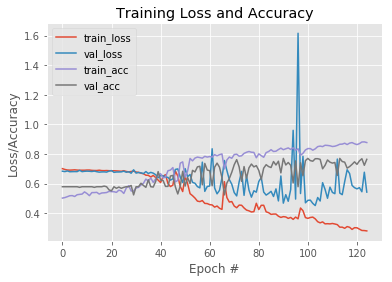

In [57]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 30s 7ms/step - loss: 0.6931 - acc: 0.4927 - val_loss: 0.6851 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 27s 6ms/step - loss: 0.6932 - 

Epoch 114/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6904 - acc: 0.5140 - val_loss: 0.7007 - val_acc: 0.5404
Epoch 115/125
4226/4226 [==============================] - 19s 4ms/step - loss: 0.6904 - acc: 0.5116 - val_loss: 0.7010 - val_acc: 0.5340
Epoch 116/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6908 - acc: 0.5099 - val_loss: 0.7005 - val_acc: 0.5404
Epoch 117/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6903 - acc: 0.5130 - val_loss: 0.6992 - val_acc: 0.5319
Epoch 118/125
4226/4226 [==============================] - 19s 4ms/step - loss: 0.6904 - acc: 0.5133 - val_loss: 0.7047 - val_acc: 0.5085
Epoch 119/125
4226/4226 [==============================] - 19s 4ms/step - loss: 0.6901 - acc: 0.5106 - val_loss: 0.6994 - val_acc: 0.5298
Epoch 120/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6902 - acc: 0.5012 - val_loss: 0.7009 - val_acc: 0.5319
Epoch 121/125
4226/4226 [=========

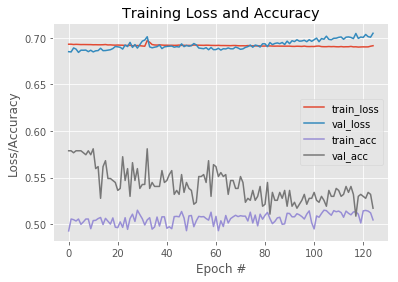

In [58]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 13s 3ms/step - loss: 0.7039 - acc: 0.4974 - val_loss: 0.6858 - val_acc: 0.5702
Epoch 2/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6979 - 

Epoch 114/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6958 - acc: 0.5007 - val_loss: 0.6871 - val_acc: 0.5617
Epoch 115/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6967 - acc: 0.5005 - val_loss: 0.6912 - val_acc: 0.5511
Epoch 116/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6996 - acc: 0.5085 - val_loss: 0.7184 - val_acc: 0.4234
Epoch 117/125
4226/4226 [==============================] - 9s 2ms/step - loss: 0.6954 - acc: 0.5088 - val_loss: 0.6973 - val_acc: 0.4681
Epoch 118/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6951 - acc: 0.4995 - val_loss: 0.7072 - val_acc: 0.4234
Epoch 119/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6953 - acc: 0.4981 - val_loss: 0.6902 - val_acc: 0.5574
Epoch 120/125
4226/4226 [==============================] - 10s 2ms/step - loss: 0.6969 - acc: 0.5099 - val_loss: 0.6860 - val_acc: 0.5787
Epoch 121/125
4226/4226 [==========

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


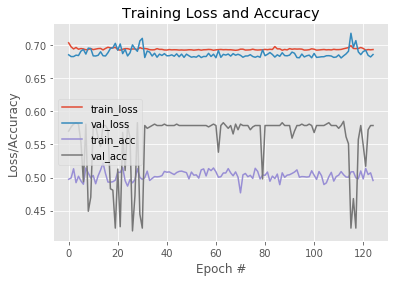

In [59]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

# BERT- SCALED Engineered Feature and UNSCALED BERT dimensions

In [15]:
def getFeaturesAndTargetRemoveDate(_df):
    train_y = _df['target']
    train = _df.drop(['date','target'],axis =1)
    return train, train_y

In [16]:
trainingData = pd.read_csv('train_SEFnNSB_bert_tnfi.csv')
testingData =  pd.read_csv('test_SEFnNSB_bert_tnfi.csv')

In [17]:
# list(trainingData.columns)

In [18]:
train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (4696, 1613) test (308, 1613) len(train_y) 4696 len(test_y) 308


In [19]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.525974025974026
classification_score
               precision    recall  f1-score   support

         0.0       0.01      0.11      0.01         9
         1.0       0.95      0.54      0.69       299

   micro avg       0.53      0.53      0.53       308
   macro avg       0.48      0.32      0.35       308
weighted avg       0.93      0.53      0.67       308



In [46]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               161400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 171,601
Trainable params: 171,601
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 1s 346us/step - loss: 2.9955 - a

4226/4226 [==============================] - 0s 47us/step - loss: 0.3907 - acc: 0.8978 - val_loss: 0.8880 - val_acc: 0.7106
Epoch 113/125
4226/4226 [==============================] - 0s 49us/step - loss: 0.4027 - acc: 0.8907 - val_loss: 0.8296 - val_acc: 0.7426
Epoch 114/125
4226/4226 [==============================] - 0s 47us/step - loss: 0.4033 - acc: 0.8945 - val_loss: 0.8371 - val_acc: 0.7447
Epoch 115/125
4226/4226 [==============================] - 0s 47us/step - loss: 0.3971 - acc: 0.8942 - val_loss: 0.8596 - val_acc: 0.7362
Epoch 116/125
4226/4226 [==============================] - 0s 47us/step - loss: 0.3973 - acc: 0.8940 - val_loss: 0.8450 - val_acc: 0.7404
Epoch 117/125
4226/4226 [==============================] - 0s 48us/step - loss: 0.3972 - acc: 0.8904 - val_loss: 0.9332 - val_acc: 0.7021
Epoch 118/125
4226/4226 [==============================] - 0s 50us/step - loss: 0.4194 - acc: 0.8829 - val_loss: 0.9467 - val_acc: 0.7000
Epoch 119/125
4226/4226 [=======================

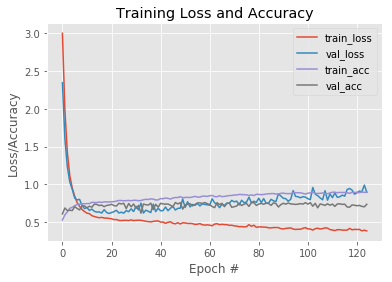

In [41]:
featureLength = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 25s 6ms/step - loss: 0.6932 - acc: 0.5050 - val_loss: 0.6886 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6930 - 

Epoch 114/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6930 - acc: 0.5028 - val_loss: 0.6845 - val_acc: 0.5787
Epoch 115/125
4226/4226 [==============================] - 23s 6ms/step - loss: 0.6931 - acc: 0.5024 - val_loss: 0.6883 - val_acc: 0.5766
Epoch 116/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6930 - acc: 0.5069 - val_loss: 0.6835 - val_acc: 0.5787
Epoch 117/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6931 - acc: 0.5009 - val_loss: 0.6884 - val_acc: 0.5787
Epoch 118/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6930 - acc: 0.5099 - val_loss: 0.6830 - val_acc: 0.5787
Epoch 119/125
4226/4226 [==============================] - 23s 6ms/step - loss: 0.6936 - acc: 0.4870 - val_loss: 0.6848 - val_acc: 0.5787
Epoch 120/125
4226/4226 [==============================] - 23s 5ms/step - loss: 0.6930 - acc: 0.5026 - val_loss: 0.6884 - val_acc: 0.5787
Epoch 121/125
4226/4226 [=========

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


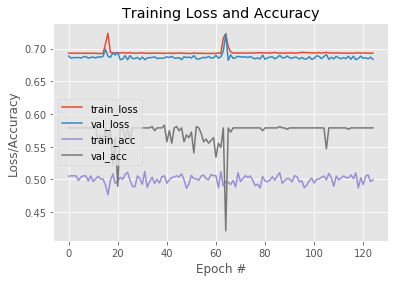

In [42]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 806, 32)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 39s 9ms/step - loss: 0.6895 - acc: 0.5442 - val_loss: 0.6775 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.6813 

Epoch 114/125
4226/4226 [==============================] - 37s 9ms/step - loss: 0.2773 - acc: 0.8743 - val_loss: 1.2666 - val_acc: 0.6468
Epoch 115/125
4226/4226 [==============================] - 37s 9ms/step - loss: 0.2698 - acc: 0.8760 - val_loss: 1.2686 - val_acc: 0.6383
Epoch 116/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.3157 - acc: 0.8564 - val_loss: 1.1094 - val_acc: 0.6298
Epoch 117/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.4286 - acc: 0.8015 - val_loss: 0.9764 - val_acc: 0.6532
Epoch 118/125
4226/4226 [==============================] - 37s 9ms/step - loss: 0.3593 - acc: 0.8336 - val_loss: 1.0864 - val_acc: 0.6596
Epoch 119/125
4226/4226 [==============================] - 37s 9ms/step - loss: 0.3067 - acc: 0.8611 - val_loss: 1.0463 - val_acc: 0.6638
Epoch 120/125
4226/4226 [==============================] - 36s 9ms/step - loss: 0.2803 - acc: 0.8715 - val_loss: 1.1695 - val_acc: 0.6511
Epoch 121/125
4226/4226 [=========

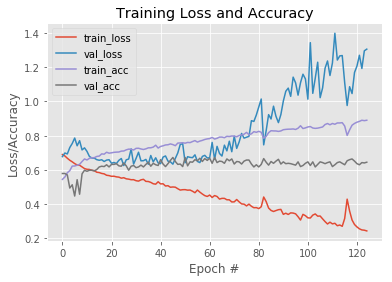

In [43]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 21s 5ms/step - loss: 0.6936 - acc: 0.5059 - val_loss: 0.6869 - val_acc: 0.5787
Epoch 2/125
4226/4226 [==============================] - 19s 5ms/step - loss: 0.6930 - 

Epoch 114/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6801 - acc: 0.5031 - val_loss: 0.7545 - val_acc: 0.5362
Epoch 115/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6787 - acc: 0.5329 - val_loss: 0.7487 - val_acc: 0.5319
Epoch 116/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6865 - acc: 0.5121 - val_loss: 0.7515 - val_acc: 0.5149
Epoch 117/125
4226/4226 [==============================] - 29s 7ms/step - loss: 0.6824 - acc: 0.5237 - val_loss: 0.7559 - val_acc: 0.5234
Epoch 118/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6798 - acc: 0.5232 - val_loss: 0.7705 - val_acc: 0.5489
Epoch 119/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6775 - acc: 0.5180 - val_loss: 0.8048 - val_acc: 0.4957
Epoch 120/125
4226/4226 [==============================] - 28s 7ms/step - loss: 0.6772 - acc: 0.5246 - val_loss: 0.8034 - val_acc: 0.5213
Epoch 121/125
4226/4226 [=========

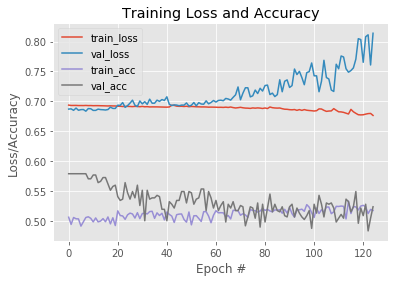

In [44]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 1613, 32)          128       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 806, 32)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/125
4226/4226 [==============================] - 17s 4ms/step - loss: 0.6970 - acc: 0.4988 - val_loss: 0.6859 - val_acc: 0.5702
Epoch 2/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6955 - 

Epoch 114/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6946 - acc: 0.4957 - val_loss: 0.6892 - val_acc: 0.5596
Epoch 115/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6937 - acc: 0.5028 - val_loss: 0.6841 - val_acc: 0.5787
Epoch 116/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6934 - acc: 0.5012 - val_loss: 0.6835 - val_acc: 0.5787
Epoch 117/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6933 - acc: 0.4950 - val_loss: 0.6910 - val_acc: 0.5447
Epoch 118/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6935 - acc: 0.5019 - val_loss: 0.6898 - val_acc: 0.5468
Epoch 119/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6944 - acc: 0.4804 - val_loss: 0.6858 - val_acc: 0.5766
Epoch 120/125
4226/4226 [==============================] - 14s 3ms/step - loss: 0.6932 - acc: 0.4983 - val_loss: 0.6878 - val_acc: 0.5723
Epoch 121/125
4226/4226 [=========

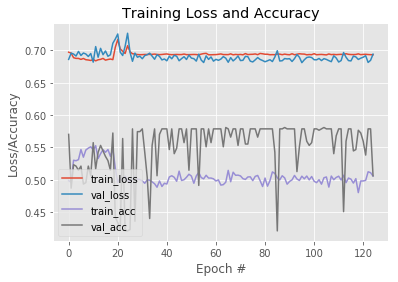

In [45]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)